<a href="https://colab.research.google.com/github/zahramoradi1998m/liquidity-risk-prediction-deep-learning/blob/main/preprocess_Claims_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [8]:
# Load dataset
dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/mar/liquidity-risk-prediction-deep-learning/Khesaraat (2).xlsx',usecols=[0,2])
dataset.head()

,PayAmount,BeginDate
0,5480052,13950610
1,5238493,13950617
2,38161802,13950617
3,2741438,13950617
4,4120585,13950618


In [9]:
# Sort the dataset by BeginDateKey and sum values for each date
dataset=dataset.sort_values(by=['BeginDate'])
dataset=dataset.groupby(['BeginDate']).sum()

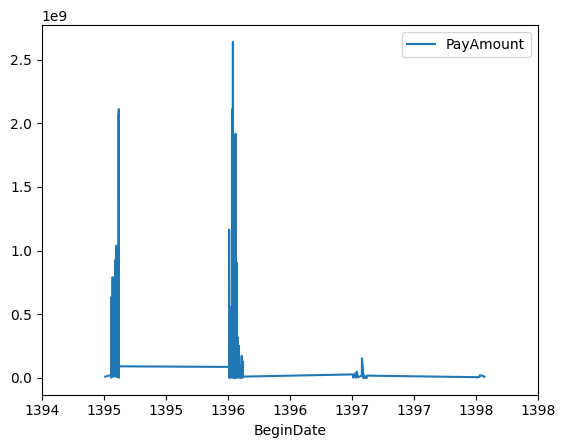

In [10]:
# Display dataset plot
dataset.plot()
xticks = plt.xticks()[0]
plt.xticks(xticks, [str(x)[:4] for x in xticks])
plt.show()


In [11]:
dataset.head()

,PayAmount
BeginDate,
13950123,10195738
13950609,23287918
13950610,87335738
13950612,4051721
13950613,186242160


In [12]:
# Scaling data using MinMaxScaler
scaler = MinMaxScaler()
dataset1 = scaler.fit_transform(dataset)

# **Select best time step**

loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  55  56  57  58  59  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  83  84  85  86  87  88  89  90  91  92
  93  95  96  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 115 116 117 119 120 121 122 123 124 125 126 127 128 129 131 132 133 134
 135 136 137 138 139 141 142 143 144 146 147 149 150 151 152 153 154 155
 156 157 158 159 161 162 163 164 165 166 167 168 169 171 172 173 174 175
 177 178 179 180 181 183 184 185 186 187 188 189 190 191 192 195 196 197
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 221 222 224 225 226 227 228 229 230 231 232 234 235 236 237
 238 239 240 241 243 244 245 246 247 249 250 252 253 254 255 

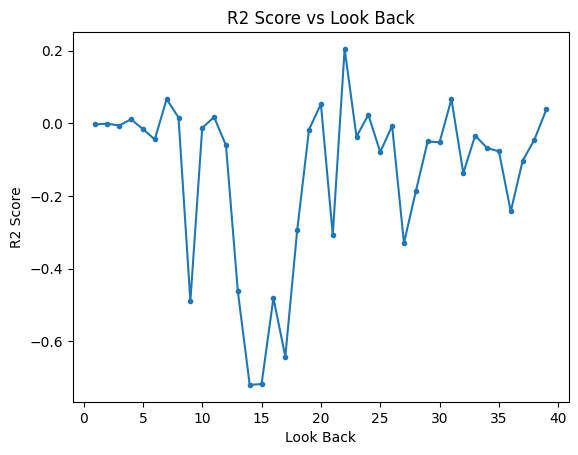

In [13]:
# Function to create a time series dataset
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

# Training and evaluating the model for different look_back values
time_step=[]
look_backs=range(1,40)
for i in look_backs:
  look_back =i
  X, Y = create_dataset(dataset1, look_back)
  XX, testX, YY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  i = 0
  for train_index, test_index in cv.split(XX):
    print("loop:", i)
    if i == 6:
      print( "TRAIN:", train_index, "TEST:", test_index)
      break
    else:
      i+=1

  trainX = XX[train_index]
  trainY = YY[train_index]
  trainY=trainY.reshape(-1,1)

  validX = XX[test_index]
  validY = YY[test_index]
  validY=validY.reshape(-1,1)

  # Train the model
  f=LinearRegression()
  f.fit(trainX, trainY)

  # Predict and evaluate
  ols_testPredicted=f.predict(testX)
  ols_testR2 = r2_score(testY, ols_testPredicted)
  time_step.append(ols_testR2)

# Plotting the results
plt.plot(look_backs, time_step, marker='.')
plt.xlabel('Look Back')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Look Back')
plt.show()

# **create a time series dataset**

In [14]:
look_back =time_step.index(max(time_step))+1
X, Y = create_dataset(dataset1, look_back)
XX, testX_Claims, YY, testY_Claims = train_test_split(X, Y, test_size=0.2, random_state=42)

#kfold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
i = 0
for train_index, test_index in cv.split(XX):
  print("loop:", i)
  if i == 6:
    print( "TRAIN:", train_index, "TEST:", test_index)
    break
  else:
    i+=1

trainX_Claims = XX[train_index]
trainY_Claims = YY[train_index]
trainY_Claims=trainY_Claims.reshape(-1,1)

validX_Claims = XX[test_index]
validY_Claims = YY[test_index]
validY_Claims=validY.reshape(-1,1)

loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
TRAIN: [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  58  59  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  83  84  85  86  87  88  89  90  91  92  93  95  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 125 126 127 128 129 131 132 133 134 136 137 138 139
 141 142 143 144 145 146 147 149 150 151 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 183 184 185 186 187 188 189 190 191 192 194 195 196 197 198
 199 200 201 203 204 205 206 207 208 209 211 212 213 214 215 216 218 219
 220 221 222 224 225 226 227 228 229 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 252 253 254 255 

In [15]:
# Reshape datasets for models that require input data with an additional dimension
trainX1_Claims = np.reshape(trainX_Claims, (trainX_Claims.shape[0], 1, trainX_Claims.shape[1]))
validX1_Claims = np.reshape(validX_Claims, (validX_Claims.shape[0], 1, validX_Claims.shape[1]))
testX1_Claims = np.reshape(testX_Claims, (testX_Claims.shape[0], 1, testX_Claims.shape[1]))